# **Computational Methods**
## **DataSets & Classification**

Written by Niv Keren, nivkeren1@mail.tau.ac.il 

Based on [SciPy Optimization Tutorial](https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html#global-optimization),

*Computational Methods* class: 0341-2300

2020/Semester I; Tuesdays 14:00-16:00

FACULTY OF EXACT SCIENCES | GEOPHYSICS & PLANETARY SCIENCES  
Tel Aviv University

---
## **[Seaborn](https://seaborn.pydata.org/):** statistical data visualization
Seaborn is a Python data visualization library based on matplotlib.  
It provides a high-level interface for drawing attractive and informative statistical graphics.  
You might need to [install the library](https://seaborn.pydata.org/installing.html).

---
On the first part of class we are going to look look at **Historical Hourly Weather Data 2012-2017 of San Fransisco.** The data is taken [from kaggle](https://www.kaggle.com/selfishgene/historical-hourly-weather-data/data)

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [15, 6.67]

In [6]:
sf_df = pd.read_csv("files/san-fransisco-weather.csv")
sf_df

,datetime,humidity,pressure,temperature,wind_direction,wind speed,description
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-10-01 13:00:00,88.0,1009.0,289.480000,150.0,2.0,light rain
2,2012-10-01 14:00:00,87.0,1009.0,289.474993,147.0,2.0,sky is clear
3,2012-10-01 15:00:00,86.0,1009.0,289.460618,141.0,2.0,sky is clear
4,2012-10-01 16:00:00,85.0,1009.0,289.446243,135.0,2.0,sky is clear
...,...,...,...,...,...,...,...
45248,2017-11-29 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN
45249,2017-11-29 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN
45250,2017-11-29 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN
45251,2017-11-29 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN


The dataset contains ~5 years of high temporal resolution (hourly measurements) data of various weather attributes.  
Five numerical:
1. humedity [%]
2. pressure [hpa]
3. tempreture [K]
4. wind direction [deg]
5. wind speed [m / s]

One text column:
1. weateher description

and the date and time

---

### **Feature Exploration, Engineering and Cleaning**
Lets dive into the data. First, we can look at each attribute unique values

In [21]:
for (col_name, col_data) in sf_df.iteritems():
    print(col_name)
    print(col_data.unique())
    print("----------------------------------------------------------------------------------------")

datetime
['2012-10-01 12:00:00' '2012-10-01 13:00:00' '2012-10-01 14:00:00' ...
 '2017-11-29 22:00:00' '2017-11-29 23:00:00' '2017-11-30 00:00:00']
----------------------------------------------------------------------------------------
humidity
[ nan  88.  87.  86.  85.  84.  83.  82.  81.  80.  79.  78.  77.  76.
  75.  74.  73.  72.  71.  70.  69.  68.  67.  66.  65.  64.  63.  51.
  56.  94.  18.  11.  15.  25.  31.  27.  28.  89.  48.  62.  42.  53.
  58.  60.  50.  41.  16.  17.  21.  24. 100.  55.  57.  47.  91.  46.
  52.  43.  40.  49.  59.  95.  45.  93.  97.  44.  13.  26.  30.  32.
  39.  61.  54.  37.  36.  33.  96.  35.  90.  34.  92.  98.  99.  29.
  38.  20.  22.  19.  23.   8.  10.   7.   9.  12.  14.   6.]
----------------------------------------------------------------------------------------
pressure
[  nan 1009. 1010. 1011. 1012. 1013. 1014. 1015. 1016. 1001. 1000. 1007.
 1008. 1017. 1018. 1019. 1026. 1024. 1023. 1020. 1021. 1022. 1025. 1027.
 1028. 1029. 1031. 103

we can get a simple summary description of the numerical columns 

In [19]:
sf_df.describe()

,humidity,pressure,temperature,wind_direction,wind speed
count,44311.000000,44429.000000,44457.000000,44453.000000,44458.000000
mean,76.875042,1018.844133,288.155913,209.314917,2.786765
std,17.396016,7.334071,5.332913,95.579532,2.283998
min,6.000000,985.000000,272.300000,0.000000,0.000000
25%,68.000000,1014.000000,284.670000,160.000000,1.000000
50%,81.000000,1018.000000,287.610000,232.000000,2.000000
75%,89.000000,1023.000000,291.014667,280.000000,4.000000
max,100.000000,1044.000000,313.620000,360.000000,43.000000


As we can see in the summary and the values not all measurements exists in the dataset.  
In some hours all the parameters are missing and other only part of them are missing.
First we can delete all the fully missing hours

In [34]:
sf_df_clean = sf_df.dropna(how='all', subset=['humidity', 'pressure', 'temperature', 'wind_direction', 'wind speed'])
print(f"removed {len(sf_df) - len(sf_df_clean)} lines from the dataset")

removed 793 lines from the dataset


Next, we can check what are the other miisig values

In [36]:
sf_df_clean[sf_df_clean.isnull().any(axis=1)]

,datetime,humidity,pressure,temperature,wind_direction,wind speed,description
300,2012-10-14 00:00:00,52.0,1021.0,289.97,270.0,4.0,NaN
318,2012-10-14 18:00:00,67.0,1026.0,291.16,30.0,1.0,NaN
358,2012-10-16 10:00:00,93.0,1018.0,287.02,300.0,1.0,NaN
401,2012-10-18 05:00:00,72.0,1013.0,290.22,290.0,3.0,NaN
440,2012-10-19 20:00:00,46.0,NaN,299.58,30.0,3.0,NaN
...,...,...,...,...,...,...,...
14749,2014-06-08 01:00:00,NaN,1008.0,295.50,273.0,6.0,haze
14758,2014-06-08 10:00:00,NaN,1009.0,286.32,186.0,1.0,mist
24346,2015-07-12 22:00:00,79.0,1008.0,298.57,NaN,6.0,haze
32985,2016-07-06 21:00:00,70.0,1008.0,296.30,360.0,NaN,mist


we can either fill the missing values or delete the rows.  
we could use interpolation to fill missing data. Interpolate values acording to the adjacent hours, linear or nearest neighbours.
Few thing we should consider:
* Does interpolation fits the data? 
* Can we interpolate if there is more then on consecutive values.  

Because the number of rows is insignificant (only 178 out of more then 40000 rows) we will delete them.

In [40]:
sf_df_clean = sf_df_clean.dropna(how='any')
len(sf_df_clean)

44282

wind speed
categorize the data
visulize the 

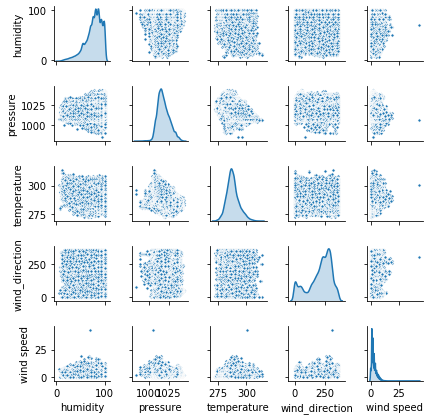

In [43]:
sns.pairplot(sf_df_clean[['humidity', 'pressure', 'temperature', 'wind_direction', 'wind speed']],
             palette = 'seismic',size=1.2,diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=10))

Let's get back to [`root`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root.html#scipy.optimize.root):
One of the functions parameters is *method*. We can choose the type of solver out of the listed options.  
Each option need different intial parameters to start to solve for the roots.

The defult solver is `hybr` - MINPACK’s hybrd and hybrj routines (modified Powell method).
This rotine needs an inital geuss and find the closest root

In [ ]:
sol = root(humps)

Another solver is `krylov`

In [ ]:
sol = root(humps, method='krylov', x0=0.0)
sol

There are other root solving methods that require different parameters to intialize rotine. [see documantation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root.html#scipy.optimize.root)

---
### **Curve Fit**
We can define an exponential function. The is defined by the three arguments.

In [ ]:
from scipy.optimize import curve_fit

In [ ]:
def exp(x, a, b, c):
    return a * np.exp(b * x) + c

We can add random noise to the functions original values, and try to reproduce the functions original arguments.

In [ ]:
a, b, c = 2, 0.6, 3
x = np.linspace(0, 10, 1000)
y = exp(x, a, b, c)
y_pertubate = y + np.random.normal(0, 10, y.shape[0])
plt.scatter(x, y_pertubate, s=2, color='C0', label="data")
plt.plot(x, y, color='C1', label=f"$y={a} * e^({b}x) + {c}$")
plt.legend()
plt.show()

To fit the data to the function we can use [`scipy.optimize.curve_fit()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html).  \
`curve_fit` uses non-linear least squares to fit a function, f, to data.  
Not like polyfit or interpolation we can try to fit any kind of function in this example an exponential function.

In [ ]:
popt, pcov = curve_fit(exp, x, y_pertubate)
popt

We can plot the original function against the the fitted function

In [ ]:
plt.scatter(x, y_pertubate, s=2, color='C0', label="data")
plt.plot(x, y, 'C1', label=f"y={a} * e^({b}x) + {c}")
plt.plot(x, exp(x, popt[0], popt[1], popt[2]), '--C2', label="curve fit")
plt.legend()
plt.show()

---
### **One Dimensional Minimization**

The function [`scipy.optimize.minimize_scalar()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize_scalar.html#scipy.optimize.minimize_scalar) finds the minimum
value of a one-dimensional function.

In [ ]:
x = np.linspace(-1, 1.5, 50)
y = humps(x)
plt.plot(x, y)
plt.yticks(np.arange(0, 100, 10))
plt.xticks(np.arange(-1, 1.6, 0.1))
plt.grid()
plt.show()

In [ ]:
from scipy.optimize import minimize_scalar

In [ ]:
res = minimize_scalar(humps)
print(res)
res.x, humps(res.x)

We can use the `bounded` method to find the minimum in a limited area.

In [ ]:
res = minimize_scalar(humps, bounds=(0.7, 0.8), method='bounded')
print(res.x, humps(res.x))
res = minimize_scalar(humps, bounds=(0.5, 0.7), method='bounded', tol=1e-3)
print(res.x, humps(res.x))
res = minimize_scalar(humps, bounds=(0.5, 0.8), method='bounded', tol=1e-1)
print(res.x, humps(res.x))

---
### **Global optimization**
Global optimization aims to find the global minimum of a function within given bounds, in the presence of potentially many local minima.  
Typically, global minimizers efficiently search the parameter space, while using a local minimizer (e.g., `minimize()` or `minimize_scalar()`) under the hood.  
SciPy contains a number of good global optimizers. Here, we’ll use those on the same objective function, namely the eggholder function:

In [ ]:
def eggholder(x):
    return (-(x[1] + 47) * np.sin(np.sqrt(abs(x[0]/2 + (x[1]  + 47))))
            -x[0] * np.sin(np.sqrt(abs(x[0] - (x[1]  + 47)))))

bounds = [(-512, 512), (-512, 512)]

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

x = np.arange(-512, 513)
y = np.arange(-512, 513)
xgrid, ygrid = np.meshgrid(x, y)
xy = np.stack([xgrid, ygrid])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(45, -45)
ax.plot_surface(xgrid, ygrid, eggholder(xy), cmap='terrain')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('eggholder(x, y)')
plt.show()

We now use the global optimizers to obtain the minimum and the function value at the minimum.  
We’ll store the results in a dictionary so we can compare different optimization results later.

In [ ]:
from scipy.optimize import shgo, dual_annealing, differential_evolution, basinhopping
results = dict()
results['shgo'] = shgo(eggholder, bounds) # SHGO stands for “simplicial global optimization”.
results['shgo']

In [ ]:
results['DA'] = dual_annealing(eggholder, bounds)
results['DA']

All optimizers return an `OptimizeResult`, which in addition to the solution contains information on the number of function evaluations, whether the optimization was successful, and more.

In [ ]:
results['DE'] = differential_evolution(eggholder, bounds)
results['BH'] = basinhopping(eggholder, bounds)

`shgo` has a second method, which returns all local minima rather than only what it thinks is the global minimum:

In [ ]:
results['shgo_sobol'] = shgo(eggholder, bounds, n=200, iters=5, sampling_method='sobol')

In [ ]:
results['shgo_sobol']

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.imshow(eggholder(xy), interpolation='bilinear', origin='lower', cmap='gray')
ax.set_xlabel('x')
ax.set_ylabel('y')
def plot_point(res, marker='o', color=None):
    ax.plot(512+res.x[0], 512+res.x[1], marker=marker, color=color, ms=10)

plot_point(results['BH'], color='y')  # basinhopping           - yellow
plot_point(results['DE'], color='c')  # differential_evolution - cyan
plot_point(results['DA'], color='w')  # dual_annealing.        - white

# SHGO produces multiple minima, plot them all (with a smaller marker size)
plot_point(results['shgo'], color='r', marker='+')
plot_point(results['shgo_sobol'], color='r', marker='x')
for i in range(results['shgo_sobol'].xl.shape[0]):
    ax.plot(512 + results['shgo_sobol'].xl[i, 0],
            512 + results['shgo_sobol'].xl[i, 1],
            'ro', ms=2)

ax.set_xlim([-4, 514*2])
ax.set_ylim([-4, 514*2])
plt.show()